In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

DIRECTORY = '/content/gdrive/MyDrive/rumcajs/liscie/Cherry'
CATEGORIES = ['Cherry_healthy', 'Cherry_nothealthy']
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

data = [] 
count = 0   
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category) 
    for img in os.listdir(folder): 
        try: 
            if count == 1500:   
                break
            img_path = os.path.join(folder, img) 
            img_arr = cv2.imread(img_path) 
            img_arr = cv2.resize(img_arr, IMAGE_SIZE) 
            data.append([img_arr, label]) 
            count += 1   
        except:
            print("nie dziala")
    count = 0

random.shuffle(data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
x=[]
y=[]
for features, labels in data: 
  x.append(features)
  y.append(labels)

In [5]:
x=np.array(x) 

y=np.array(y)

In [6]:

x=x/255 
x.shape

(3000, 128, 128, 3)

In [7]:
!pip install keras

In [10]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense



model = Sequential()


model.add(Conv2D(64, (3,3), activation= 'relu',input_shape = (128,128, 3)) )


model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64, (3,3), activation= 'sigmoid'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(2, activation = 'sigmoid')) 


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.fit(x,y, epochs =6, validation_split=0.15)

Epoch 1/6
80/80 [==============================] - 140s 2s/step - loss: 0.0281 - accuracy: 0.9898 - val_loss: 0.0351 - val_accuracy: 0.9911
Epoch 2/6
80/80 [==============================] - 122s 2s/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.0928 - val_accuracy: 0.9667
Epoch 3/6
80/80 [==============================] - 129s 2s/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0313 - val_accuracy: 0.9911
Epoch 4/6
80/80 [==============================] - 127s 2s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0216 - val_accuracy: 0.9911
Epoch 5/6
80/80 [==============================] - 128s 2s/step - loss: 0.0357 - accuracy: 0.9843 - val_loss: 0.0601 - val_accuracy: 0.9711
Epoch 6/6
80/80 [==============================] - 125s 2s/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 0.0187 - val_accuracy: 0.9956


94/94 [==============================] - 37s 393ms/step


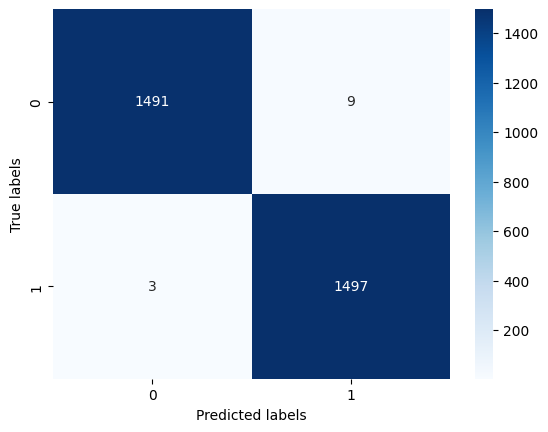

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(x)


y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = confusion_matrix(y, y_pred_classes)


sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

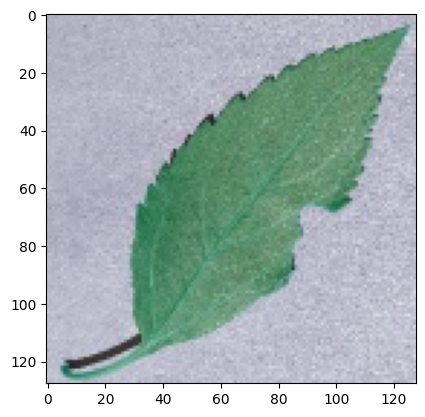

1/1 [==============================] - 0s 37ms/step
Healthy


In [ ]:
idx2 = random.randint(0, len(x))
plt.imshow(x[idx2, :] )
plt.show()
predi = model.predict(x[idx2,:].reshape(1,128,128,3))

z = predi[0, 1]>0.5
if z==0:
   print("Healthy")
else:
   print("Unhealthy")